In [71]:
import pandas as pd
import seaborn as sns

In [3]:
df_shoe = pd.read_excel('StockX-Data-Contest-2019-3.xlsx', sheet_name='Raw Data')
df_shoe

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California


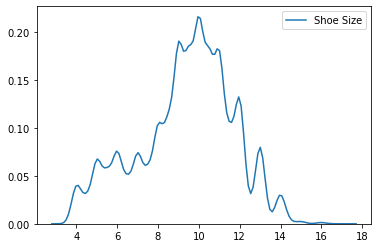

In [72]:
sns.kdeplot(data=df_shoe['Shoe Size'])

In [4]:
df_shoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  int64         
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [32]:
df_agg = df_shoe.groupby(['Order Date', 'Brand', 'Sneaker Name', 'Shoe Size']).mean()
df_agg = df_agg.reset_index()
df_agg = df_agg[['Order Date', 'Brand', 'Sneaker Name', 'Shoe Size', 'Sale Price']]
df_agg

,Order Date,Brand,Sneaker Name,Shoe Size,Sale Price
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,11.0,1097.0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,11.0,685.0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,11.0,690.0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,11.5,1075.0
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,8.5,798.0
...,...,...,...,...,...
44412,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,6.0,405.0
44413,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,9.0,237.0
44414,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,10.0,263.0
44415,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,11.0,265.0


In [52]:
from datetime import timedelta


df_zebra = df_agg[(df_agg['Sneaker Name']=='Adidas-Yeezy-Boost-350-V2-Zebra') & (df_agg['Shoe Size']==11)
                 ].copy()
start_dt = df_zebra['Order Date'].min()
end_dt = df_zebra['Order Date'].max()

df_cal = pd.DataFrame({"cal_date": pd.date_range(start_dt, end_dt)})
df_cal['target_dt'] = df_cal['cal_date'].apply(lambda x: (x + timedelta(20)).strftime('%Y-%m-%d'))
df_cal['lst_window_dt'] = df_cal['cal_date'].apply(lambda x: pd.date_range(x, x + timedelta(13)).strftime('%Y-%m-%d').to_list())
df_cal

df_zebra = df_cal[['cal_date']].merge(df_zebra, how='left', left_on='cal_date', right_on='Order Date')
df_zebra = df_zebra[['cal_date', 'Shoe Size', 'Sale Price']]
df_zebra['cal_date'] = df_zebra['cal_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_zebra_pvt = df_zebra.pivot(index='Shoe Size', columns='cal_date', values='Sale Price')
df_zebra_pvt = df_zebra_pvt.reset_index()
##df_zebra_pvt.to_csv('dump_zebra')
df_zebra_pvt = df_zebra_pvt[df_zebra_pvt['Shoe Size'].notnull()]
df_zebra_pvt

In [66]:
import numpy as np

print('df_cal shape', df_cal.shape, 'columns', df_cal.columns)
target = df_cal['target_dt'].iloc[:-20].copy()
target = target.apply(lambda x: pd.DataFrame({'target': df_zebra_pvt[x]}))
target = pd.concat(target.to_list(), axis=0)
#print('target shape', target.shape, 'columns', target.columns)
target

df_cal shape (531, 3) columns Index(['cal_date', 'target_dt', 'lst_window_dt'], dtype='object')


,target
1,NaN
1,NaN
1,650.000000
1,629.000000
1,655.000000
...,...
1,349.500000
1,348.500000
1,NaN
1,346.666667


In [67]:
win21 = df_cal['lst_window_dt'].iloc[:-20].copy()
win21 = win21.apply(lambda x: df_zebra_pvt[x])
for row in win21:
    row.columns = np.arange(0, len(row.columns))
win21 = pd.concat(win21.to_list(), axis=0)
win21

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,654.0,635.0,NaN,659.00,655.00,645.00,660.00,NaN,NaN,NaN,622.00,630.50,NaN,625.000000
1,635.0,NaN,659.00,655.00,645.00,660.00,NaN,NaN,NaN,622.00,630.50,NaN,625.00,NaN
1,NaN,659.0,655.00,645.00,660.00,NaN,NaN,NaN,622.00,630.50,NaN,625.00,NaN,634.000000
1,659.0,655.0,645.00,660.00,NaN,NaN,NaN,622.00,630.50,NaN,625.00,NaN,634.00,NaN
1,655.0,645.0,660.00,NaN,NaN,NaN,622.00,630.50,NaN,625.00,NaN,634.00,NaN,626.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,330.0,331.0,327.50,330.00,318.00,325.00,331.25,330.00,322.00,336.00,327.50,336.25,NaN,340.000000
1,331.0,327.5,330.00,318.00,325.00,331.25,330.00,322.00,336.00,327.50,336.25,NaN,340.00,339.000000
1,327.5,330.0,318.00,325.00,331.25,330.00,322.00,336.00,327.50,336.25,NaN,340.00,339.00,341.750000
1,330.0,318.0,325.00,331.25,330.00,322.00,336.00,327.50,336.25,NaN,340.00,339.00,341.75,339.000000


In [68]:
shoesize = df_cal['target_dt'].iloc[:-20].copy()

shoesize = shoesize.apply(lambda x: pd.DataFrame({'shoe_size': df_zebra_pvt['Shoe Size']}))
shoesize = pd.concat(shoesize.to_list(), axis=0)
shoesize

,shoe_size
1,11.0
1,11.0
1,11.0
1,11.0
1,11.0
...,...
1,11.0
1,11.0
1,11.0
1,11.0


In [69]:
win21_target = pd.concat([shoesize, win21, target], axis=1)
win21_target

,shoe_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
1,11.0,654.0,635.0,NaN,659.00,655.00,645.00,660.00,NaN,NaN,NaN,622.00,630.50,NaN,625.000000,NaN
1,11.0,635.0,NaN,659.00,655.00,645.00,660.00,NaN,NaN,NaN,622.00,630.50,NaN,625.00,NaN,NaN
1,11.0,NaN,659.0,655.00,645.00,660.00,NaN,NaN,NaN,622.00,630.50,NaN,625.00,NaN,634.000000,650.000000
1,11.0,659.0,655.0,645.00,660.00,NaN,NaN,NaN,622.00,630.50,NaN,625.00,NaN,634.00,NaN,629.000000
1,11.0,655.0,645.0,660.00,NaN,NaN,NaN,622.00,630.50,NaN,625.00,NaN,634.00,NaN,626.000000,655.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,11.0,330.0,331.0,327.50,330.00,318.00,325.00,331.25,330.00,322.00,336.00,327.50,336.25,NaN,340.000000,349.500000
1,11.0,331.0,327.5,330.00,318.00,325.00,331.25,330.00,322.00,336.00,327.50,336.25,NaN,340.00,339.000000,348.500000
1,11.0,327.5,330.0,318.00,325.00,331.25,330.00,322.00,336.00,327.50,336.25,NaN,340.00,339.00,341.750000,NaN
1,11.0,330.0,318.0,325.00,331.25,330.00,322.00,336.00,327.50,336.25,NaN,340.00,339.00,341.75,339.000000,346.666667


In [70]:
#win21_target.to_csv('win21_target.csv')